In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('/content/base_uncased_gap2_norm4_lead5.csv')

In [24]:
df.head()

,segid,original,translation,scores,mean,z_scores,z_mean,model_scores,score
0,10005,О необходимости уплачивать проценты по займам ...,The need to pay interest on loans as one of th...,"[86, 91, 82]",86.333333,"[0.6155309600675426, 0.7858059361811293, 0.364...",0.588656,-0.433427,0.400000
1,735,"Быть на низ плыть, коли вёсел нет.","To be at the bottom, if you don't have oars.","[50, 39, 62]",50.333333,"[-0.5723146845468047, -1.6204085607056529, -0....",-0.795477,-0.808455,0.000000
2,9774,"На кадрах ролика видно, как полицейский боретс...",The footage shows a police officer wrestling w...,"[86, 95, 79]",86.666667,"[0.560999210789468, 0.9296953093216753, 0.4637...",0.651474,-0.463030,0.333333
3,6682,Почему бы не ввести классификацию информационн...,Why not classify information products accordin...,"[71, 86, 84]",80.333333,"[-0.17537971479608083, 0.8284516544333062, 0.5...",0.395690,-0.535011,0.200000
4,8898,Министр здравоохранения России Вероника Скворц...,Russian Minister of Health Veronika Skvortsova...,"[78, 83, 89]",83.333333,"[0.4116243837713557, 0.49802718990003697, 0.71...",0.541390,-0.331821,0.166667


In [25]:
def split_scores(data, column_name):
  for idx, l in enumerate(data[column_name]):
    lis = ast.literal_eval(l)
    for i, value in enumerate(lis):
      data.loc[idx, f'assesor_{i+1}'] = lis[i]
  return data

In [26]:
df = split_scores(df, 'scores')

In [27]:
def get_mean(data, col_name1, col_name2):
  cols = data.loc[: , col_name1 : col_name2]
  data[f"mean{col_name1[-1]}{col_name2[-1]}"] = cols.mean(axis=1)
  return data

In [28]:
df = get_mean(df, 'assesor_1', 'assesor_2')
df = get_mean(df, 'assesor_1', 'assesor_3')
df = get_mean(df, 'assesor_2', 'assesor_3')

Text(0, 0.5, 'blanc')

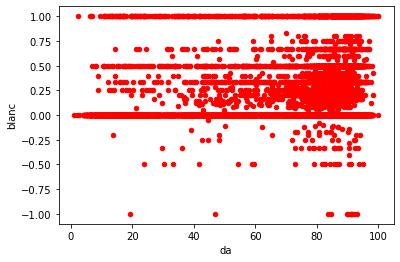

In [29]:
ax = df.plot(kind='scatter', x='mean', y='score', color='r')    
ax.set_xlabel('da')
ax.set_ylabel('blanc')

In [5]:
df.corr(method='pearson')

,segid,mean,z_mean,model_scores,score
segid,1.000000,0.484763,0.424325,0.306864,0.104647
mean,0.484763,1.000000,0.983496,0.574323,0.173505
z_mean,0.424325,0.983496,1.000000,0.556503,0.163234
model_scores,0.306864,0.574323,0.556503,1.000000,0.203052
score,0.104647,0.173505,0.163234,0.203052,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1020964c50>]],
      dtype=object)

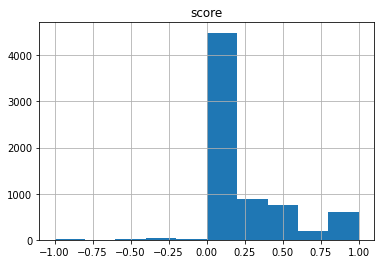

In [31]:
df.hist(column='score')

In [4]:
df['score'].mean()

0.20370129271252144

In [5]:
len(df[df.score==0])/len(df)

0.5682857142857143

In [34]:
len(df[df.score>0])/len(df)

0.417

In [35]:
df['sentence_len'] = df['original'].str.split().str.len()

Text(0, 0.5, 'blanc')

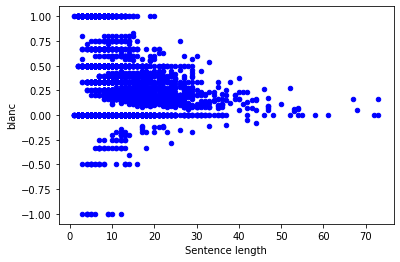

In [36]:
ax1 = df.plot(kind='scatter', x='sentence_len', y='score', color='b')    
ax1.set_xlabel('Sentence length')
ax1.set_ylabel('blanc')

In [39]:
df_short = df[(df['sentence_len']<=9) & (df['sentence_len']>=5)]
df_short['score'].corr(df_short['mean'])

0.2125030073186632

# Shuffled translation and replaced words

In [99]:
df_shuf = pd.read_csv('/content/base_cased_gap2_norm4_lead5_shuf.csv')
df_repl = pd.read_csv('/content/base_uncased_gap2_norm4_lead5_replace1.csv')

In [105]:
df_shuf['score'].mean()

0.0777038383792975

In [100]:
df = df.sort_values(by=['score'])
df_shuf = df_shuf.sort_values(by=['score'])
df_repl = df_repl.sort_values(by=['score'])

In [101]:
def add_index_col(data): 
  data = data.reset_index(drop =True)
  data['index_col'] = pd.RangeIndex(start=1, stop=len(data)+1, step=1)
  return data

In [102]:
df = add_index_col(df)
df_shuf = add_index_col(df_shuf)
df_repl = add_index_col(df_repl)

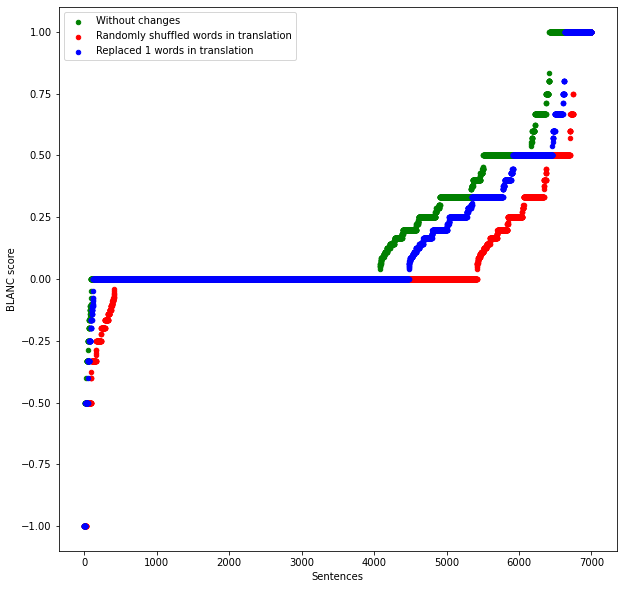

In [103]:
ax1 = df.plot(kind='scatter', x='index_col', y='score', color='g', figsize=(10,10))    
ax2 = df_shuf.plot(kind='scatter', x='index_col', y='score', color='r', ax=ax1)    
ax3 = df_repl.plot(kind='scatter', x='index_col', y='score', color='b', ax=ax1)
ax1.set_xlabel("Sentences")
ax1.set_ylabel("BLANC score")
ax1.legend(['Without changes', "Randomly shuffled words in translation", "Replaced 1 word in translation" ])

# Compare with human anotators

In [73]:
y1 = [df['assesor_1'].corr(df['mean23']), df['assesor_2'].corr(df['mean13']), df['assesor_3'].corr(df['mean12'])]
y2 = [df['assesor_1'].corr(df['score']), df['assesor_2'].corr(df['score']), df['assesor_3'].corr(df['score'])]
y1.sort()
y2.sort()
x = [1, 2, 3]

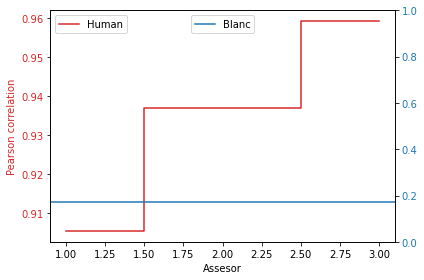

In [92]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Assesor')
ax1.set_ylabel('Pearson correlation', color=color)
ax1.step(x, y1, where= 'mid', color=color, label='Human')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
# ax2.set_ylabel('per corr', color=color)  # we already handled the x-label with ax1
ax2.axhline(y=df['score'].corr(df['mean']), color=color, label='Blanc')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper center')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()